# Lab 9: Linear regression


## Simple linear regression

### Simulating linear regression data

In [1]:
x = rnorm(100, mean=3, sd=1)
error = rnorm(100, mean=0, sd=2)
y = 2.1+1.25*x+error

data=data.frame(cbind(x,y))

### Fitting the linear regression model

In [2]:
result = lm(data$y~data$x)
summary(result)


Call:
lm(formula = data$y ~ data$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9398 -1.2352  0.1792  1.3012  4.7372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4892     0.6751   3.687 0.000372 ***
data$x        1.1985     0.2112   5.675 1.41e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.143 on 98 degrees of freedom
Multiple R-squared:  0.2473,	Adjusted R-squared:  0.2397 
F-statistic:  32.2 on 1 and 98 DF,  p-value: 1.411e-07


### Residual plot

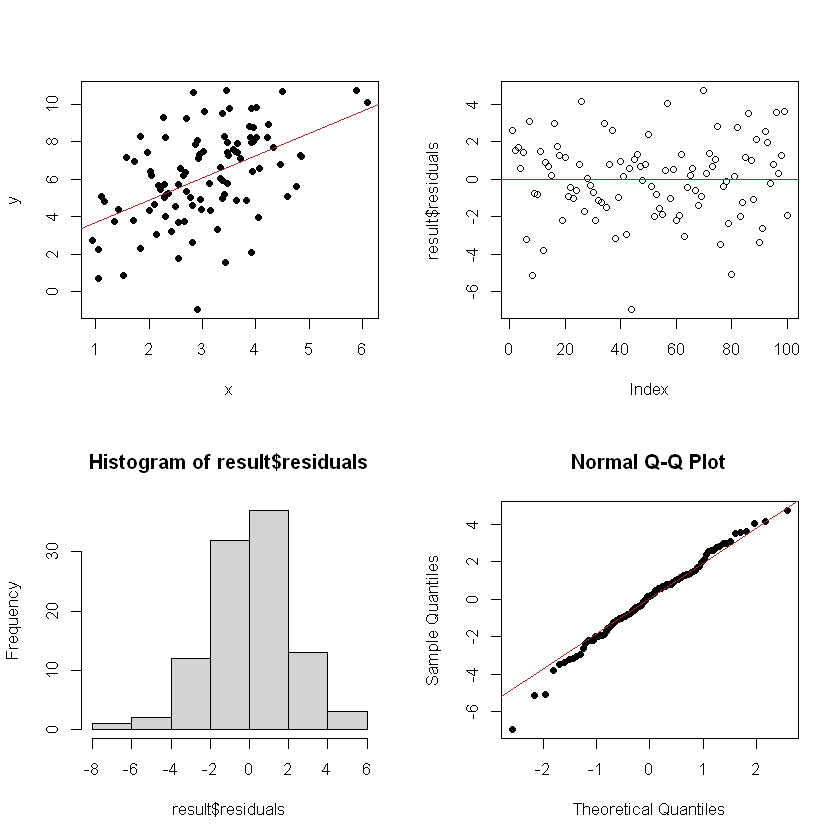

In [3]:
par(mfrow=c(2,2))
plot(x,y,pch=16)
abline(result,col="brown")
plot(result$residuals)
abline(a=0,b=0, col="brown")
hist(result$residuals)
qqnorm(result$residuals, pch=16)
qqline(result$residuals, col = "brown")

### Checking normality

In [4]:
shapiro.test(result$residuals)


	Shapiro-Wilk normality test

data:  result$residuals
W = 0.98784, p-value = 0.4962


### Prediction for new observations

In [5]:
x_new = 0.7
y_new = result$coefficients[1]+result$coefficients[2]*x_new
y_new

(Intercept) 
   3.328127

### Fitting quadratic relationships

In [6]:
x = rnorm(100, mean=0, sd=1)
y = 2.1+1.25*x^2+error
data=data.frame(cbind(x,y))
result = lm(data$y~data$x)
summary(result)


Call:
lm(formula = data$y ~ data$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1514 -1.7992 -0.3077  1.3229  9.2510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.6770     0.3038   12.10  < 2e-16 ***
data$x       -0.9102     0.2827   -3.22  0.00174 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.022 on 98 degrees of freedom
Multiple R-squared:  0.09569,	Adjusted R-squared:  0.08646 
F-statistic: 10.37 on 1 and 98 DF,  p-value: 0.001738


## Multiple linear regression
### Generating data

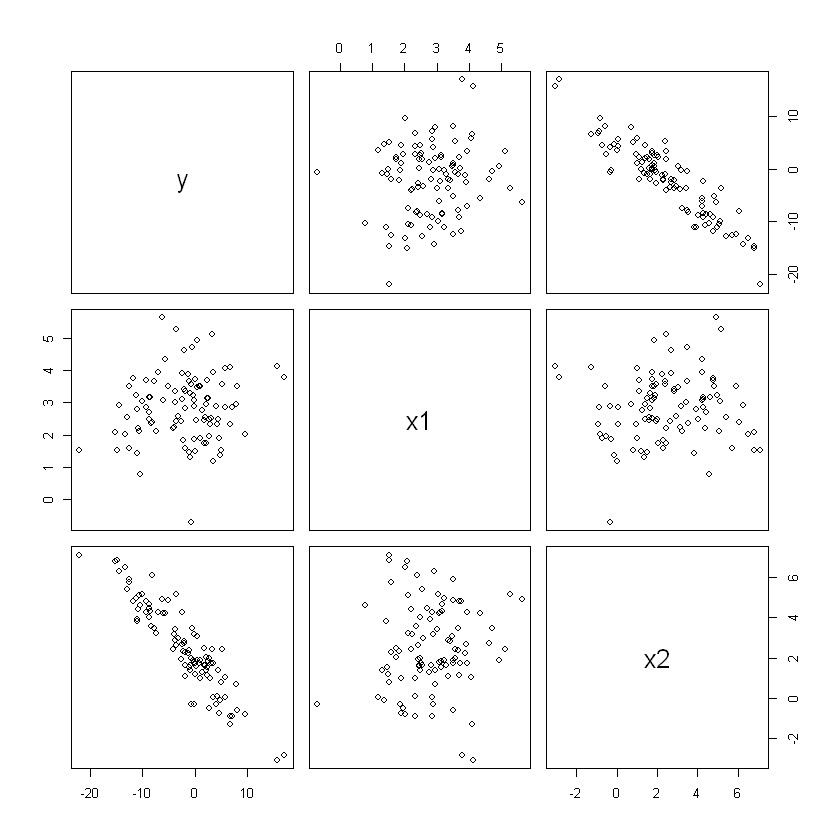

In [7]:
x1 = rnorm(100, mean=3, sd=1)
x2 = rnorm(100, mean=2.5, sd=2.1)

error = rnorm(100, mean=0, sd=2)
y = 2.1 + 1.25*x1 - 3*x2 + error

data=data.frame(cbind(y,x1,x2))
plot(data)

### Fitting the model

In [8]:
result = lm(y~x1+x2,data=data)
summary(result)


Call:
lm(formula = y ~ x1 + x2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1494 -1.4407 -0.2341  1.2179  6.0370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.7919     0.7456   2.403   0.0181 *  
x1            1.2750     0.2340   5.448 3.86e-07 ***
x2           -2.9844     0.1131 -26.396  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.386 on 97 degrees of freedom
Multiple R-squared:  0.8802,	Adjusted R-squared:  0.8777 
F-statistic: 356.3 on 2 and 97 DF,  p-value: < 2.2e-16


### Residual plot

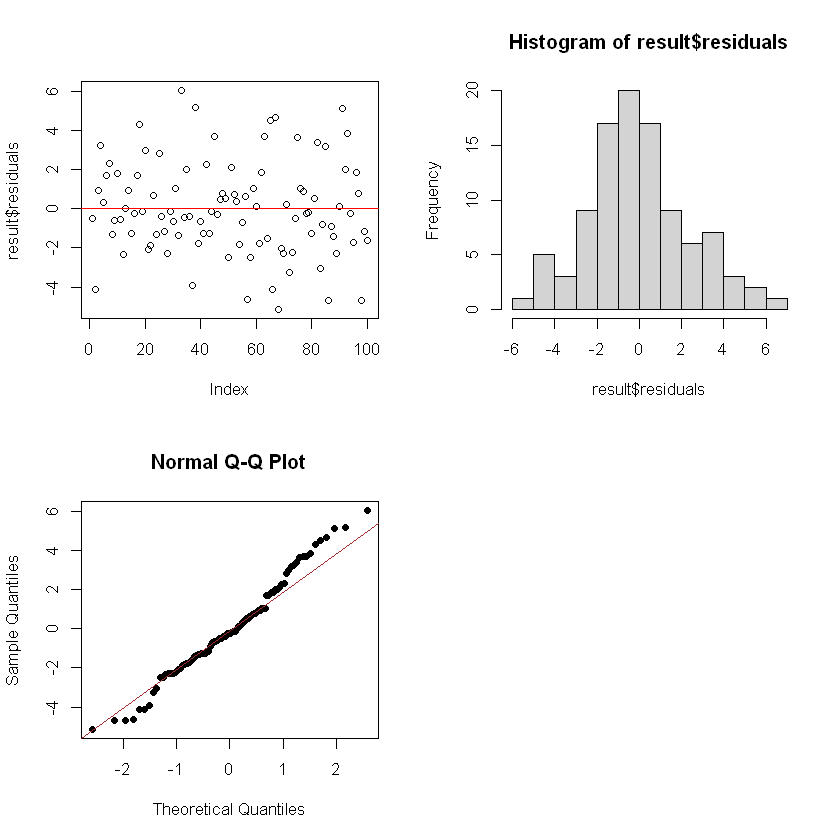

In [9]:
par(mfrow=c(2,2))
plot(result$residuals)
abline(a=0,b=0, col="red")
hist(result$residuals)
qqnorm(result$residuals, pch=16)
qqline(result$residuals, col = "brown")

### Checking the normality assumption

In [10]:
shapiro.test(result$residuals)


	Shapiro-Wilk normality test

data:  result$residuals
W = 0.98335, p-value = 0.2402


## Logistic regression
### Generating data

In [11]:
age <- round(runif(100, 18, 80))
log_odds = -2.2 + 0.02*age
p = 1/(1 + exp(-log_odds))
y <- rbinom(n = 100, size = 1, prob = p)

### Fitting the logistic model

In [12]:
mod <- glm(y ~ age, family = "binomial")
summary(mod)


Call:
glm(formula = y ~ age, family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1141  -0.8027  -0.5246  -0.4119   2.1439  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.12023    0.80674  -3.868  0.00011 ***
age          0.03712    0.01400   2.651  0.00802 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 107.86  on 99  degrees of freedom
Residual deviance: 100.03  on 98  degrees of freedom
AIC: 104.03

Number of Fisher Scoring iterations: 4
